#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-13 23:10:50.238649


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
1,Austria,AUT,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",2021-01-12,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1349090...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-12,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://deis.minsal.cl/
7,China,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
1,Finland,FIN,Pfizer/BioNTech,2021-01-13,THL via Helsingin Sanomat,https://github.com/HS-Datadesk/koronavirus-avo...
2,Austria,AUT,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
3,Netherlands,NLD,Pfizer/BioNTech,2021-01-13,National Institute for Public Health and the E...,https://twitter.com/hugodejonge/status/1349308...
4,Israel,ISR,Pfizer/BioNTech,2021-01-13,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
5,Hungary,HUN,Pfizer/BioNTech,2021-01-13,Government of Hungary,https://koronavirus.gov.hu/cikkek/1358-fovel-e...
6,Oman,OMN,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/OmaniMOH/status/1349258028...
7,Greece,GRC,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/
8,Poland,POL,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/szczepimysie/status/134928...
9,Romania,ROU,Pfizer/BioNTech,2021-01-13,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
436,United Arab Emirates,2021-01-13,"Pfizer/BioNTech, Sinopharm",https://twitter.com/NCEMAUAE/status/1349326115...,1394580,1144580.0,250000,ARE,"Pfizer/BioNTech, Sinopharm",2021-01-13,National Emergency Crisis and Disaster Managem...,https://twitter.com/NCEMAUAE,both
155,Finland,2021-01-13,Pfizer/BioNTech,https://github.com/HS-Datadesk/koronavirus-avo...,23126,23126.0,0,FIN,Pfizer/BioNTech,2021-01-13,THL via Helsingin Sanomat,https://github.com/HS-Datadesk/koronavirus-avo...,both
349,Oman,2021-01-13,Pfizer/BioNTech,https://twitter.com/OmaniMOH/status/1349258028...,20649,20649.0,0,OMN,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/OmaniMOH/status/1349258028...,both
212,Hungary,2021-01-13,Pfizer/BioNTech,https://koronavirus.gov.hu/cikkek/1358-fovel-e...,86929,86929.0,0,HUN,Pfizer/BioNTech,2021-01-13,Government of Hungary,https://koronavirus.gov.hu/cikkek/1358-fovel-e...,both
243,Israel,2021-01-13,Pfizer/BioNTech,https://datadashboard.health.gov.il/COVID-19/g...,1990803,1905006.0,85797,ISR,Pfizer/BioNTech,2021-01-13,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,both
53,Bulgaria,2021-01-13,Pfizer/BioNTech,https://coronavirus.bg/bg/statistika,15780,15780.0,0,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika,both
364,Poland,2021-01-13,Pfizer/BioNTech,https://twitter.com/szczepimysie/status/134928...,309620,309620.0,0,POL,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/szczepimysie/status/134928...,both
199,Greece,2021-01-13,Pfizer/BioNTech,https://www.data.gov.gr/datasets/mdg_emvolio/,64588,64588.0,0,GRC,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/,both
425,Spain,2021-01-13,Pfizer/BioNTech,https://www.mscbs.gob.es/profesionales/saludPu...,581638,581638.0,0,ESP,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,both
387,Romania,2021-01-13,Pfizer/BioNTech,https://vaccinare-covid.gov.ro/actualizare-zil...,154268,154268.0,0,ROU,Pfizer/BioNTech,2021-01-13,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada                  30
Israel                  26
Bahrain                 21
Italy                   17
Denmark                 17
Germany                 17
Greece                  17
Romania                 17
Estonia                 16
United States           15
Poland                  15
Oman                    15
Norway                  14
Mexico                  14
Lithuania               14
Hungary                 12
Latvia                  12
Bulgaria                10
Slovenia                10
Belgium                 10
Netherlands              8
United Arab Emirates     8
Finland                  8
Austria                  8
Spain                    7
Wales                    7
Scotland                 7
Chile                    7
France                   7
Northern Ireland         7
Croatia                  7
United Kingdom           6
Portugal                 6
England                  6
Slovakia                 6
Argentina                5
China                    4
I

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location              vaccine                            
Argentina             Sputnik V                               5
Austria               Pfizer/BioNTech                         8
Bahrain               Pfizer/BioNTech, Sinopharm             21
Belgium               Pfizer/BioNTech                        10
Bulgaria              Pfizer/BioNTech                        10
Canada                Moderna, Pfizer/BioNTech               13
                      Pfizer/BioNTech                        17
Chile                 Pfizer/BioNTech                         7
China                 CNBG, Sinovac                           4
Costa Rica            Pfizer/BioNTech                         3
Croatia               Pfizer/BioNTech                         7
Cyprus                Pfizer/BioNTech                         2
Czechia               Pfizer/BioNTech                         2
Denmark               Pfizer/BioNTech                        17
England               Oxford/AstraZeneca, Pfiz

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 457
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 438 non-null    object        
 1   date                     438 non-null    datetime64[ns]
 2   vaccine                  438 non-null    object        
 3   source_url               438 non-null    object        
 4   total_vaccinations       438 non-null    int64         
 5   people_vaccinated        434 non-null    float64       
 6   people_fully_vaccinated  438 non-null    int64         
 7   iso_code                 438 non-null    object        
 8   vaccines                 438 non-null    object        
 9   last_observation_date    438 non-null    object        
 10  source_name              438 non-null    object        
 11  source_website           438 non-null    object        
 12  _merge                   438 non-nul

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


32 239 595 (48, 3)


## Charts

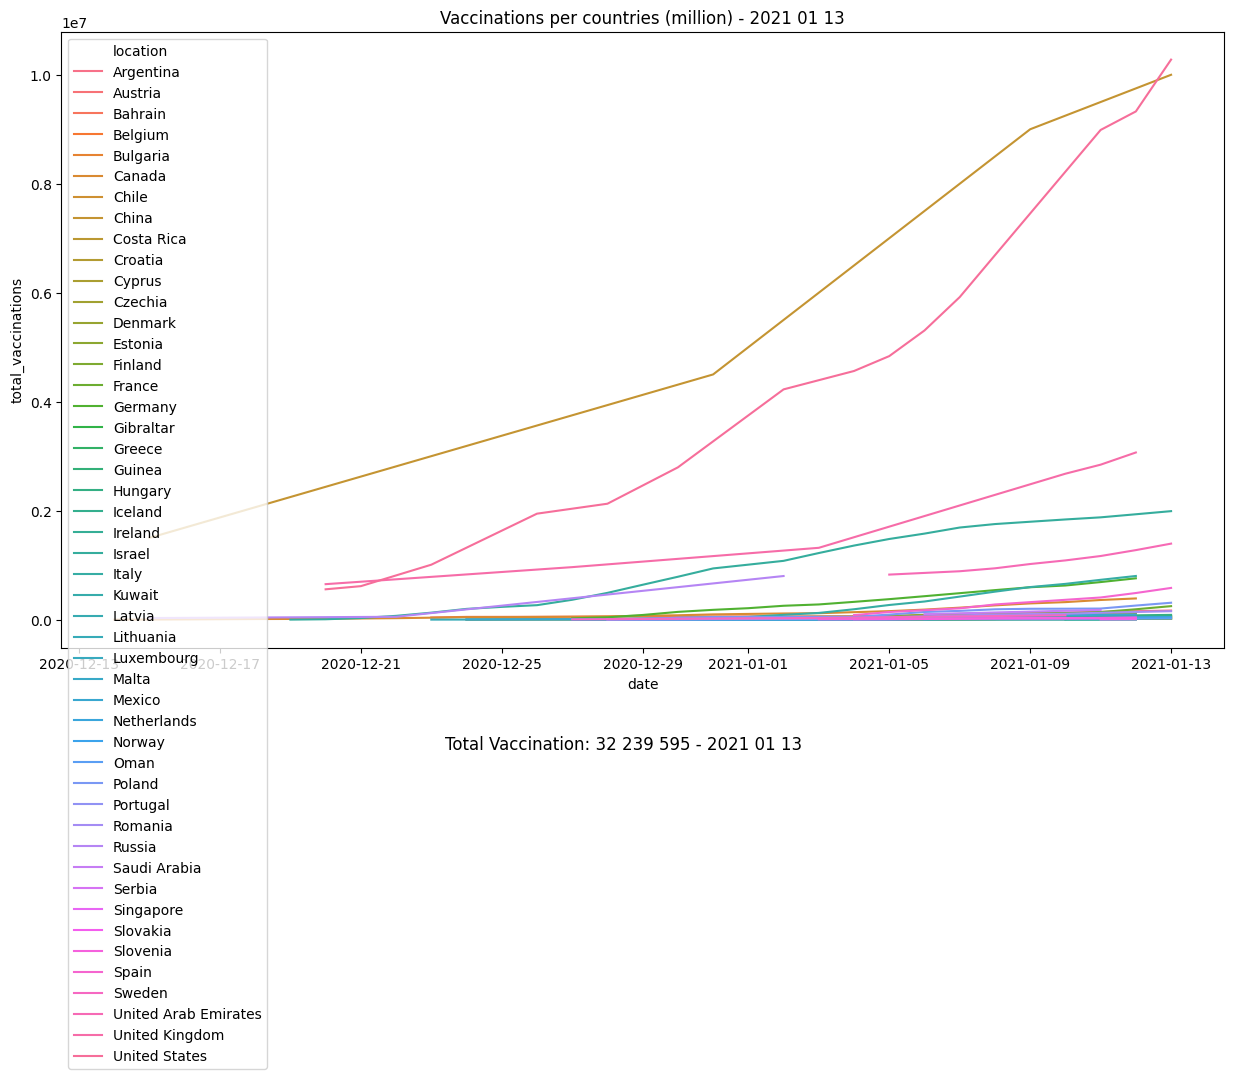

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 457
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 438 non-null    object        
 1   date                     438 non-null    datetime64[ns]
 2   vaccine                  438 non-null    object        
 3   source_url               438 non-null    object        
 4   total_vaccinations       438 non-null    int64         
 5   people_vaccinated        434 non-null    float64       
 6   people_fully_vaccinated  438 non-null    int64         
 7   iso_code                 438 non-null    object        
 8   vaccines                 438 non-null    object        
 9   last_observation_date    438 non-null    object        
 10  source_name              438 non-null    object        
 11  source_website           438 non-null    object        
 12  _merge                   438 non-nul

In [13]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


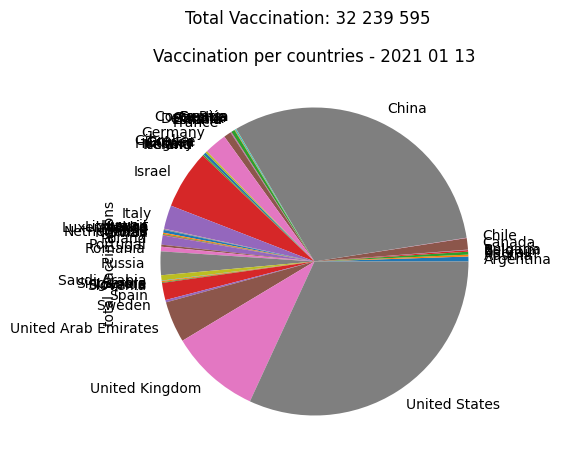

In [14]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [15]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,10278462,"Moderna, Pfizer/BioNTech",USA
China,10000000,"CNBG, Sinovac",CHN
United Kingdom,3067541,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Israel,1990803,Pfizer/BioNTech,ISR
United Arab Emirates,1394580,"Pfizer/BioNTech, Sinopharm",ARE
Italy,800730,Pfizer/BioNTech,ITA
Russia,800000,Sputnik V,RUS
Germany,758093,"Moderna, Pfizer/BioNTech",DEU
Spain,581638,Pfizer/BioNTech,ESP


In [16]:
plotLatestCountries.shape

(48, 3)

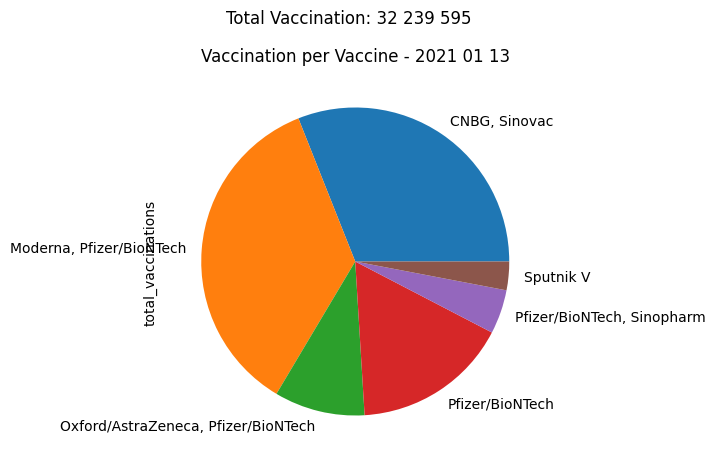

In [17]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [18]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                                966858
Pfizer/BioNTech, Sinopharm              1492356
Oxford/AstraZeneca, Pfizer/BioNTech     3067541
Pfizer/BioNTech                         5287792
CNBG, Sinovac                          10000000
Moderna, Pfizer/BioNTech               11425048
Name: total_vaccinations, dtype: int64

In [19]:
# Sweden have 10 000 doses....
#allCountries

In [20]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-13 23:11:07.422341
Time elapsed (hh:mm:ss.ms) 0:00:17.183819


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [21]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [22]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
120,http://www.wikidata.org/entity/Q1014,Africa,false,Liberia,Q1014,4731906,LBR,694,false,false,male
147,http://www.wikidata.org/entity/Q142,Europe,true,France,Q142,66628000,FRA,38484,true,false,male
140,http://www.wikidata.org/entity/Q884,Asia,false,South Korea,Q884,51466201,KOR,29742,true,false,male
22,http://www.wikidata.org/entity/Q790,North America,false,Haiti,Q790,10981229,HTI,765,false,false,male
56,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male


In [23]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,166833,Sputnik V,ARG
Austria,63280,Pfizer/BioNTech,AUT
Bahrain,97776,"Pfizer/BioNTech, Sinopharm",BHR
Belgium,53726,Pfizer/BioNTech,BEL
Bulgaria,15780,Pfizer/BioNTech,BGR
Canada,388493,"Moderna, Pfizer/BioNTech",CAN
Chile,10699,Pfizer/BioNTech,CHL
China,10000000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [24]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,166833,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,63280,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,97776,"Pfizer/BioNTech, Sinopharm",BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,53726,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,15780,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,388493,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10699,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,10000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,34553,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [25]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   47 non-null     int64   
 1   vaccine              47 non-null     object  
 2   iso_code             47 non-null     object  
 3   cid                  47 non-null     object  
 4   continent            47 non-null     object  
 5   memberEU             47 non-null     int64   
 6   country              47 non-null     object  
 7   qid                  47 non-null     object  
 8   population           47 non-null     int64   
 9   ISO3166_1            47 non-null     object  
 10  nominalGDPperCapita  46 non-null     float64 
 11  G20                  47 non-null     int64   
 12  IMF                  47 non-null     int64   
 13  genderH              47 non-null     object  
 14  _merge               47 non-null     category
 15  genderFlag           47 n

In [26]:
#CountriesData

In [27]:
CountriesData['Country'] = CountriesData.index

In [28]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.308146
population                         0.804349
nominalGDPperCapita                0.061263
G20                                0.466781
IMF                               -0.007955
genderFlag                         0.110696
Country                            0.135329
vaccinations_population_percent    0.191071
Name: total_vaccinations, dtype: float64

In [29]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.191071
memberEU                          -0.276925
population                        -0.034173
nominalGDPperCapita                0.135365
G20                               -0.058557
IMF                               -0.043255
genderFlag                         0.082082
Country                            0.127819
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [30]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


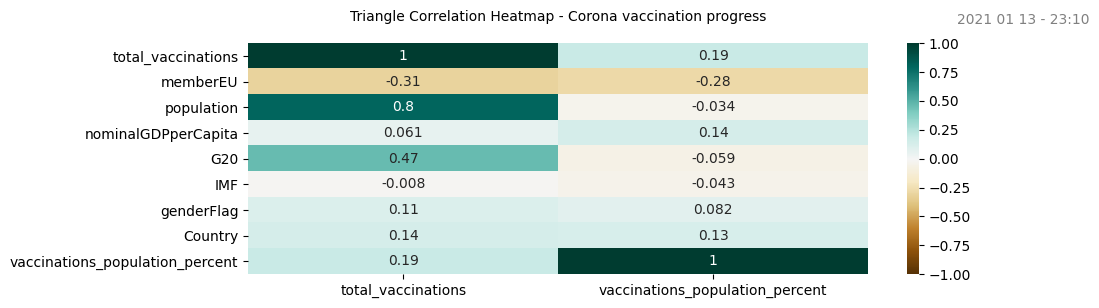

In [31]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [32]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,G20,total_vaccinations,population,country,vaccinations_population_percent,continent,memberEU,IMF
22,0,1990803,9093000,Israel,21.893797,Asia,0,0
44,0,1394580,9400145,United Arab Emirates,14.835729,Asia,0,0
2,0,97776,1492584,Bahrain,6.550787,Asia,0,0
45,1,3067541,66022273,United Kingdom,4.646221,Europe,0,0
46,1,10278462,328239523,United States of America,3.131391,North America,0,0
12,0,118073,5827463,Denmark,2.026148,Europe,1,0
20,0,4875,357050,Iceland,1.365355,Europe,0,0
23,1,800730,60317000,Italy,1.327536,Europe,1,1
42,0,581638,46733038,Spain,1.244597,Europe,1,0
41,0,24462,2066880,Slovenia,1.183523,Europe,1,0


## Vaccination numbers % of population

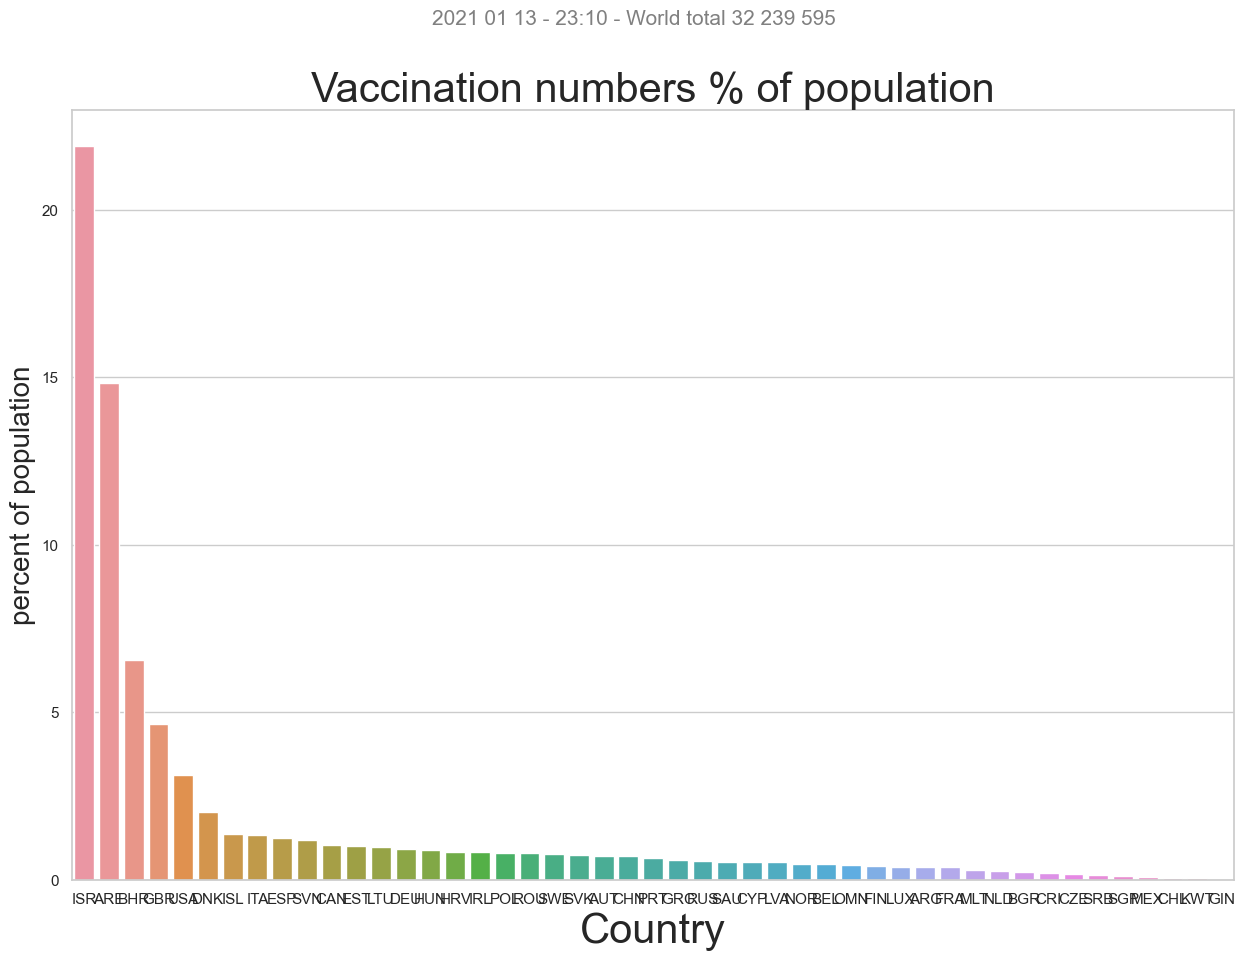

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

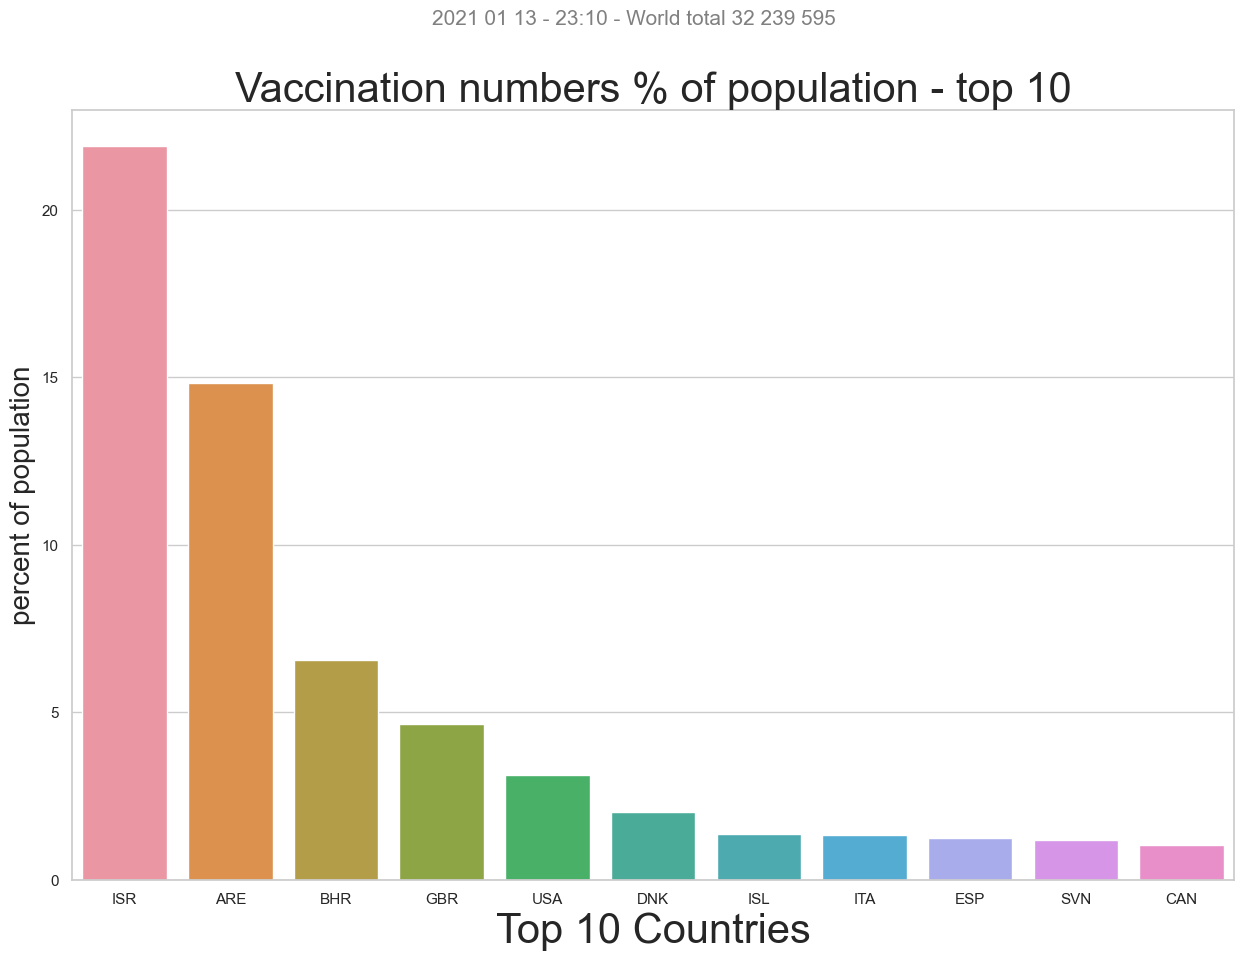

In [34]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

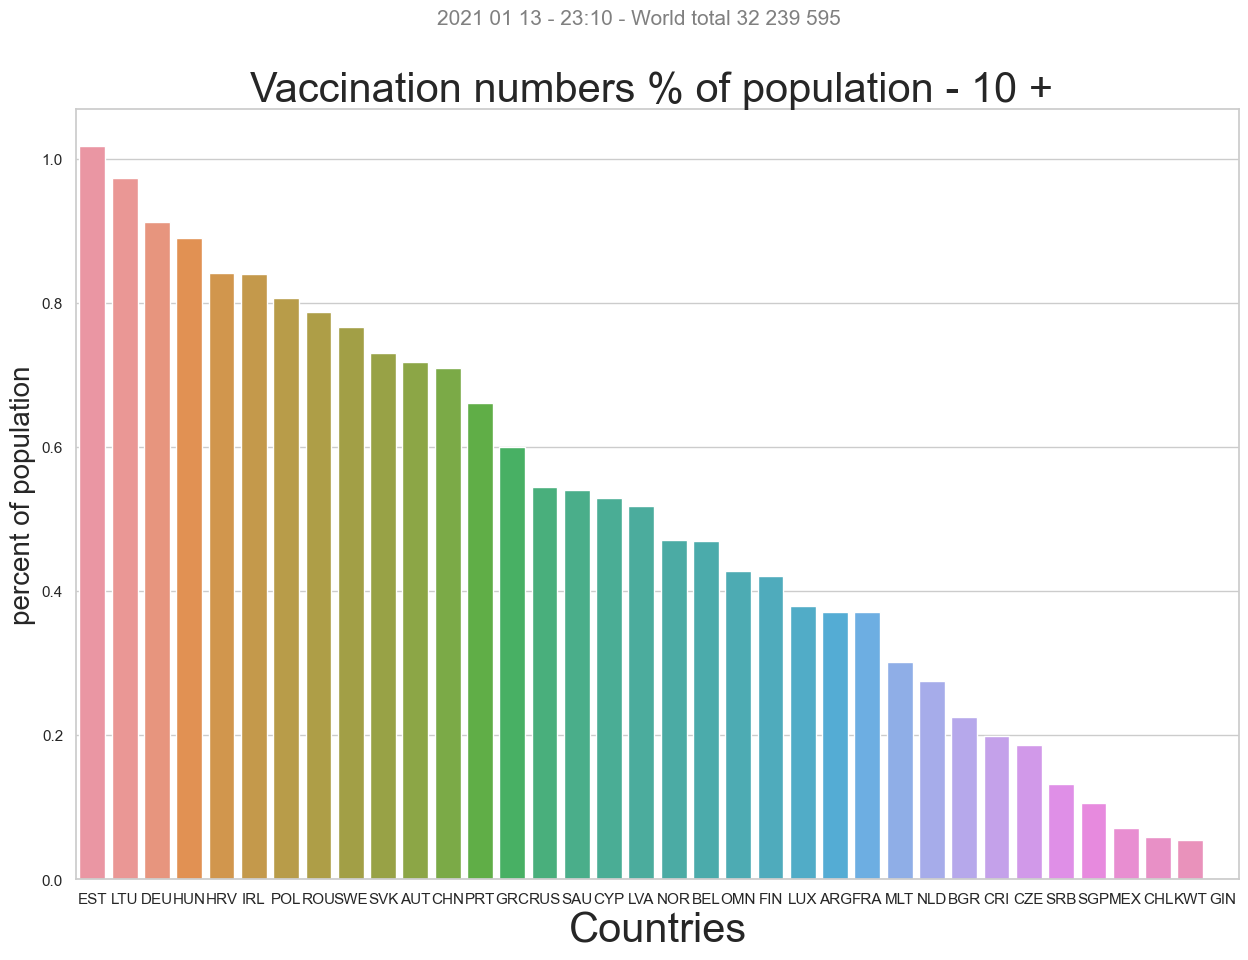

In [35]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

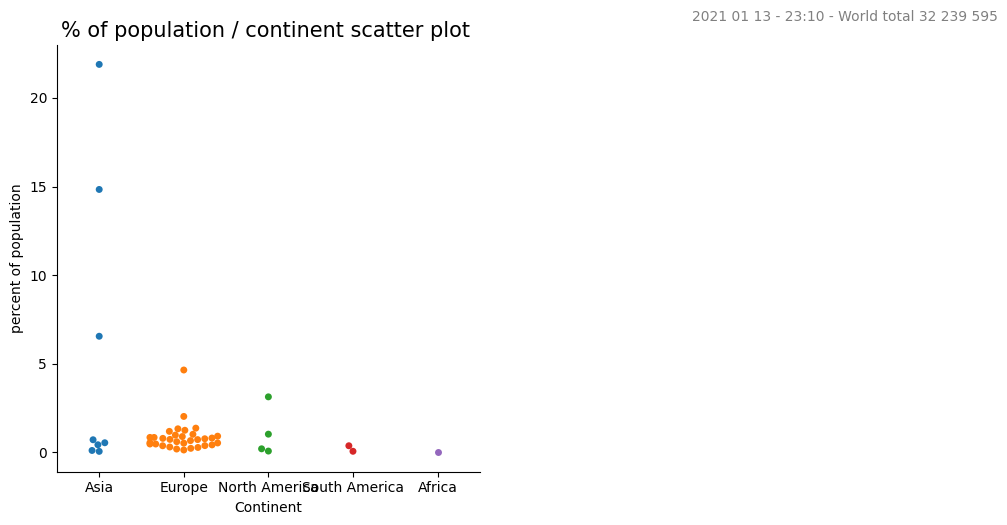

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

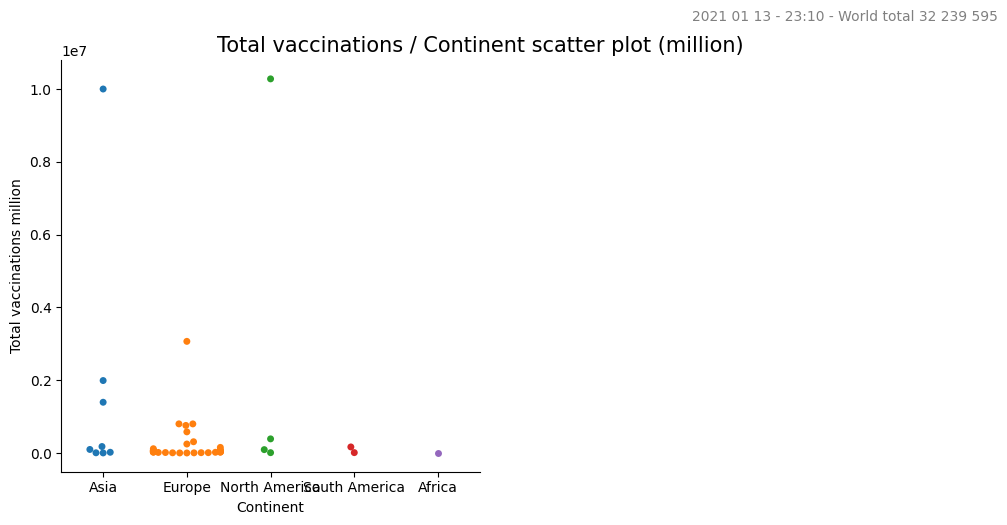

In [37]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

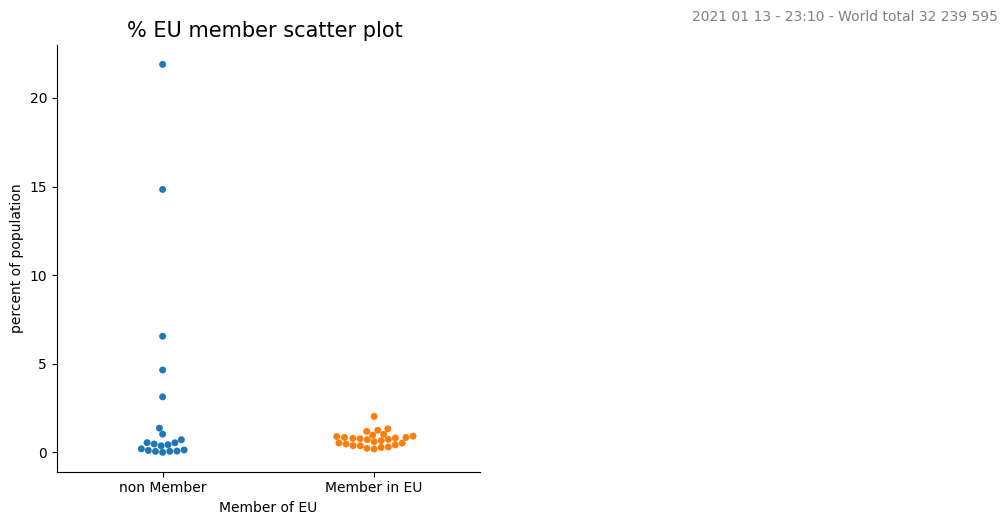

In [39]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

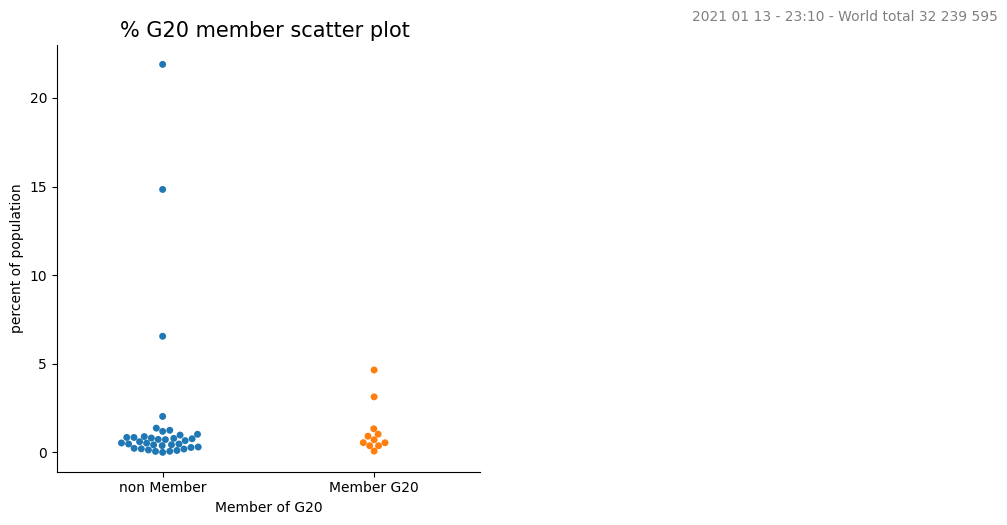

In [40]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

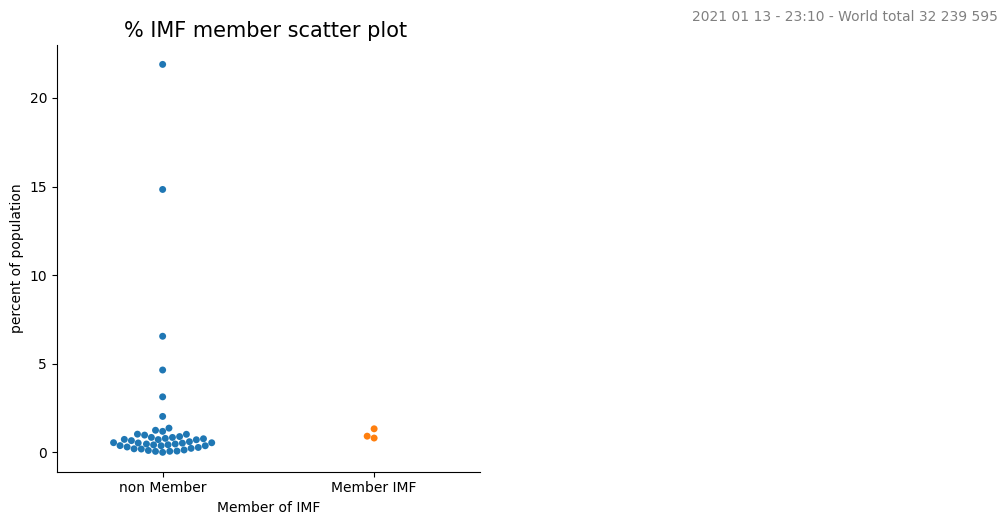

In [41]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


32 239 595 (48, 3) 7 599 107


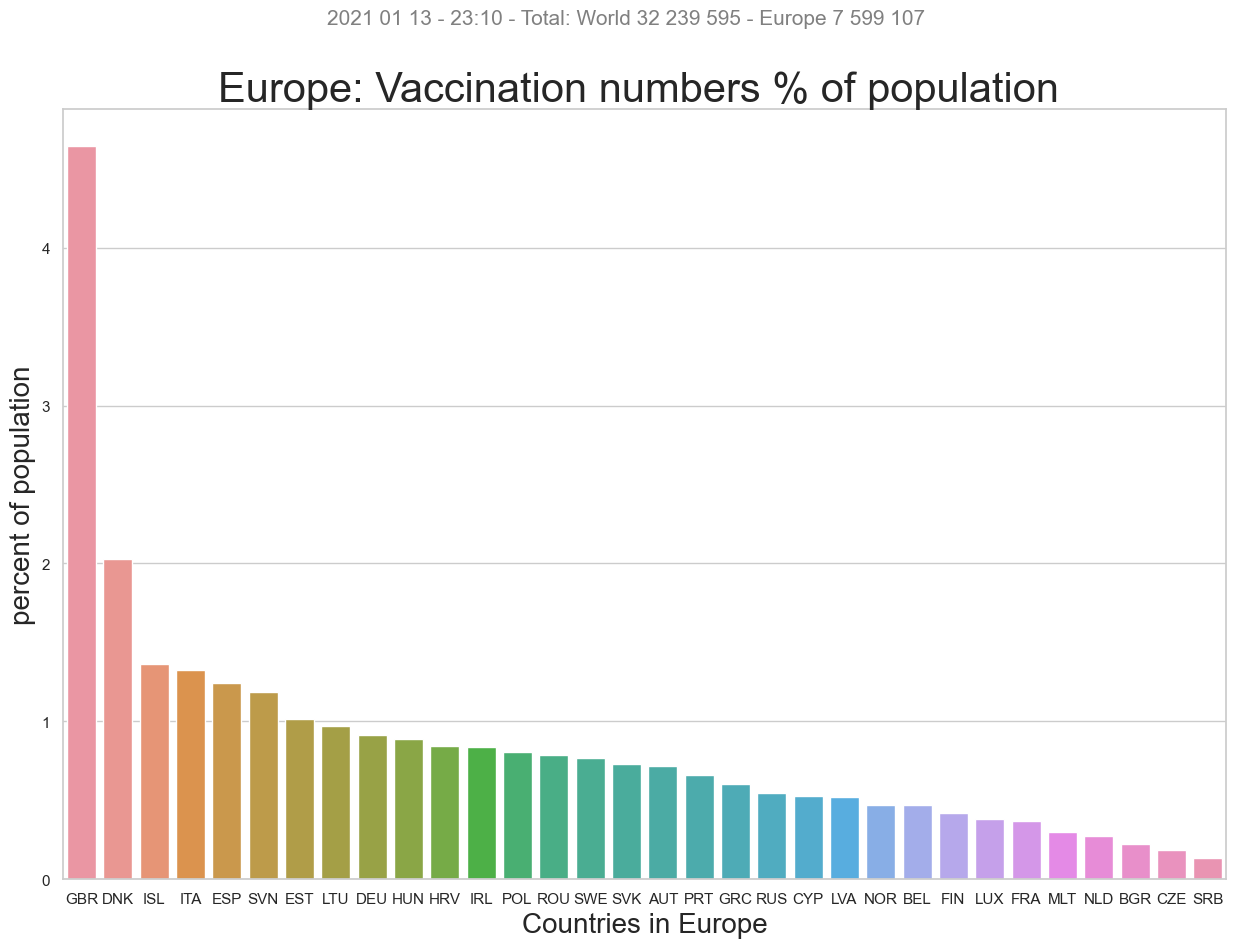

In [43]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [44]:
#CountriesDataEurope

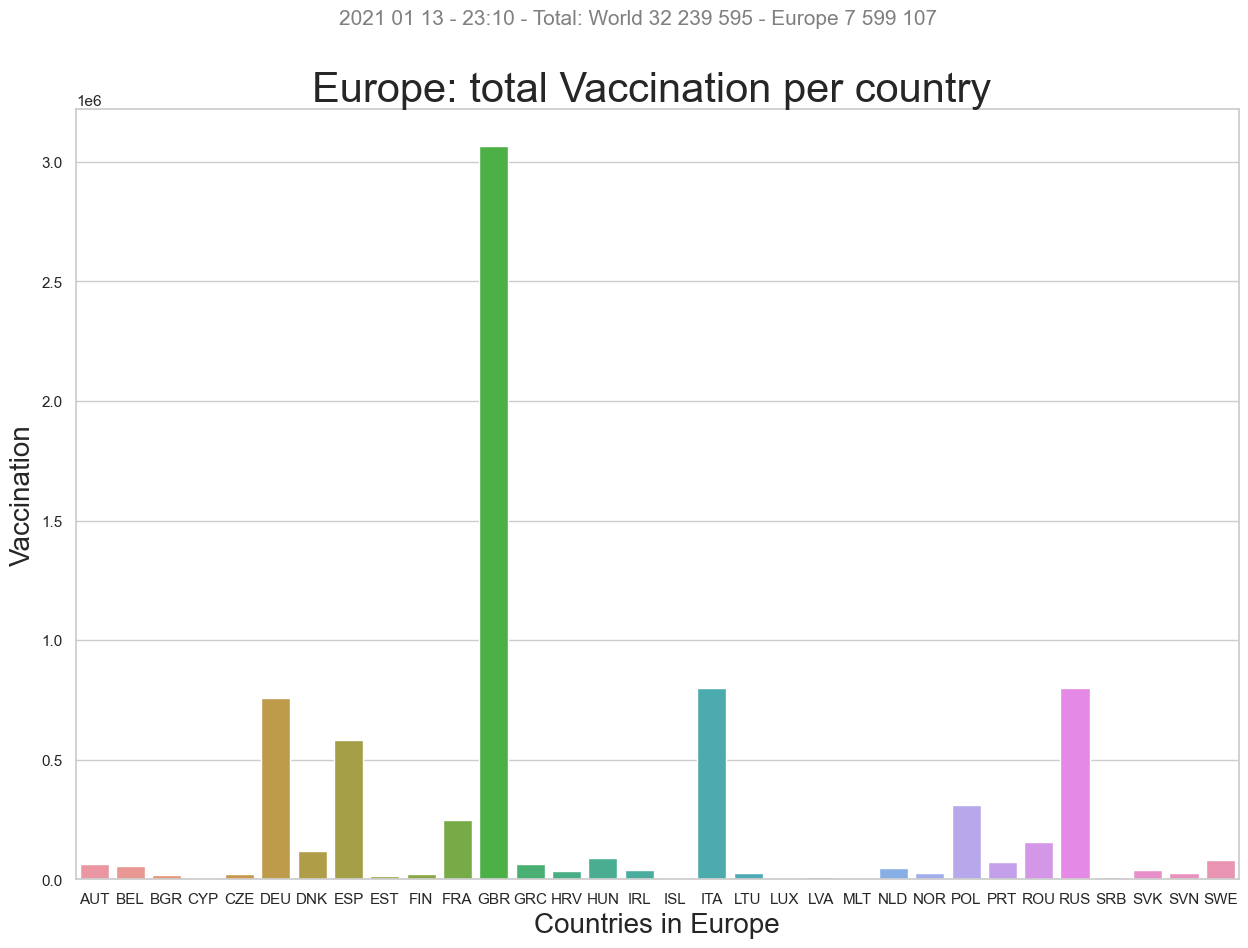

In [45]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [46]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,memberEU,head_gender,ISO3166_1,total_vaccinations,vaccinations_population_percent,country_x
36,non Member,male,ALB,0.0,0.000000,Albania
10,non Member,male,AND,0.0,0.000000,Andorra
25,non Member,male,ARM,0.0,0.000000,Armenia
8,Member in EU,male,AUT,63280.0,0.718339,Austria
29,non Member,male,AZE,0.0,0.000000,Azerbaijan
24,Member in EU,male,BEL,53726.0,0.469986,Belgium
22,Member in EU,male,BGR,15780.0,0.225427,Bulgaria
32,non Member,male,BIH,0.0,0.000000,Bosnia and Herzegovina
39,non Member,male,BLR,0.0,0.000000,Belarus
3,non Member,male,CHE,0.0,0.000000,Switzerland


## All countries on continent Europe

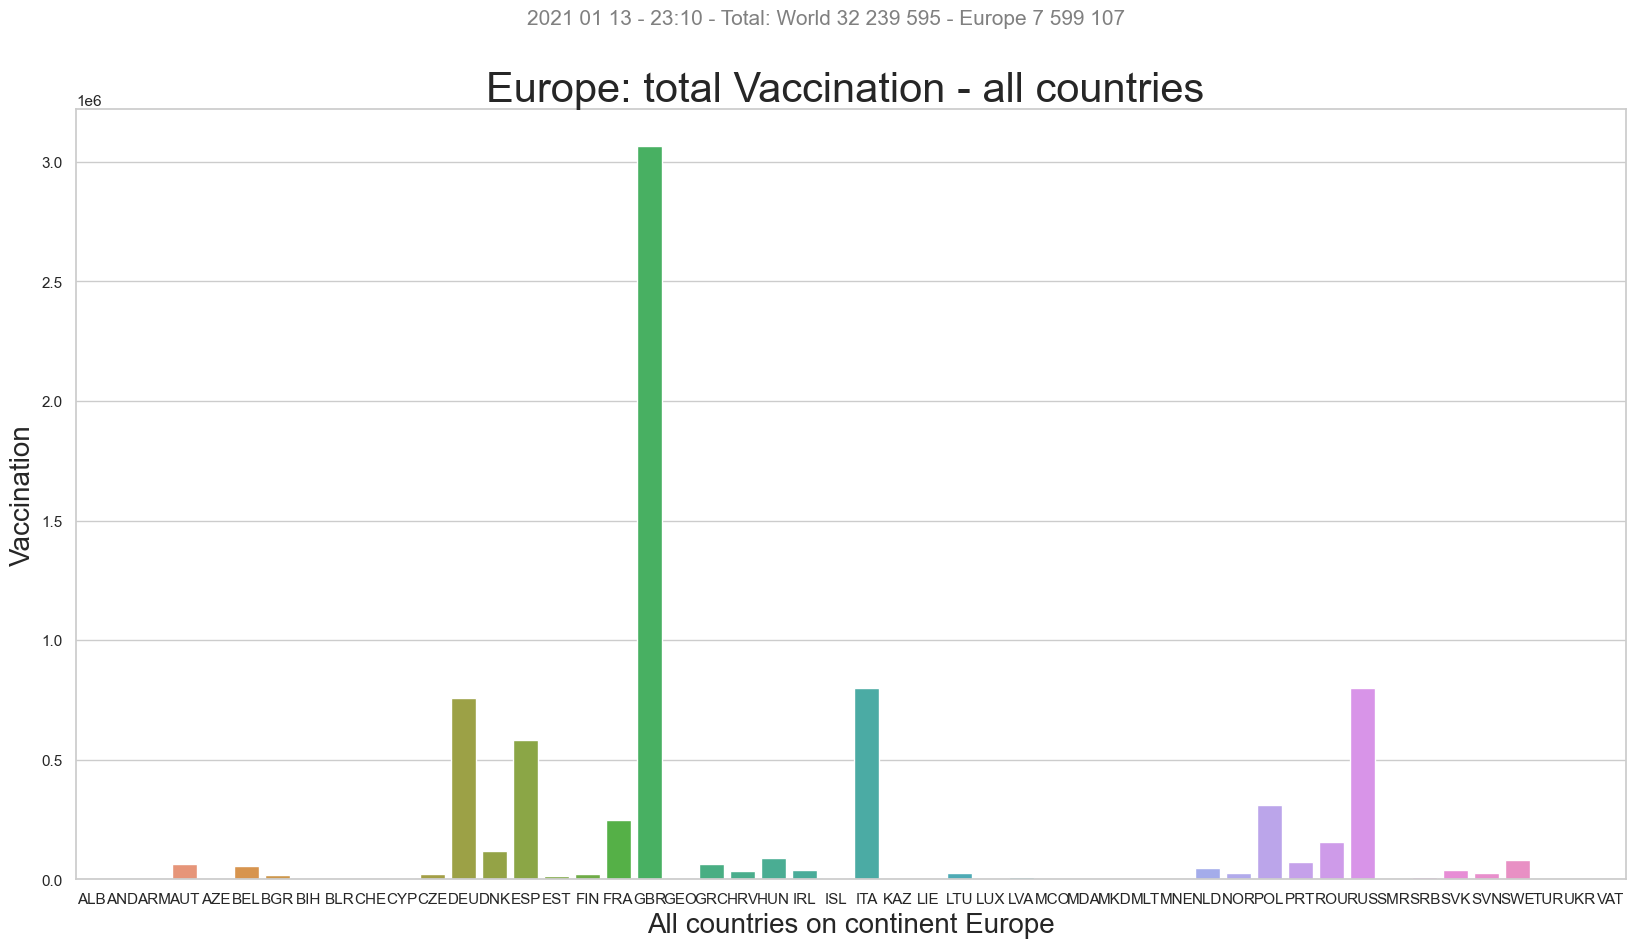

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [48]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   memberEU                         50 non-null     object 
 1   head_gender                      50 non-null     object 
 2   ISO3166_1                        50 non-null     object 
 3   total_vaccinations               50 non-null     float64
 4   vaccinations_population_percent  50 non-null     float64
 5   country_x                        50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [49]:
CountriesDataEuropeAll


,memberEU,head_gender,ISO3166_1,total_vaccinations,vaccinations_population_percent,country_x
36,non Member,male,ALB,0.0,0.000000,Albania
10,non Member,male,AND,0.0,0.000000,Andorra
25,non Member,male,ARM,0.0,0.000000,Armenia
8,Member in EU,male,AUT,63280.0,0.718339,Austria
29,non Member,male,AZE,0.0,0.000000,Azerbaijan
24,Member in EU,male,BEL,53726.0,0.469986,Belgium
22,Member in EU,male,BGR,15780.0,0.225427,Bulgaria
32,non Member,male,BIH,0.0,0.000000,Bosnia and Herzegovina
39,non Member,male,BLR,0.0,0.000000,Belarus
3,non Member,male,CHE,0.0,0.000000,Switzerland


### Countries in EU

In [50]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

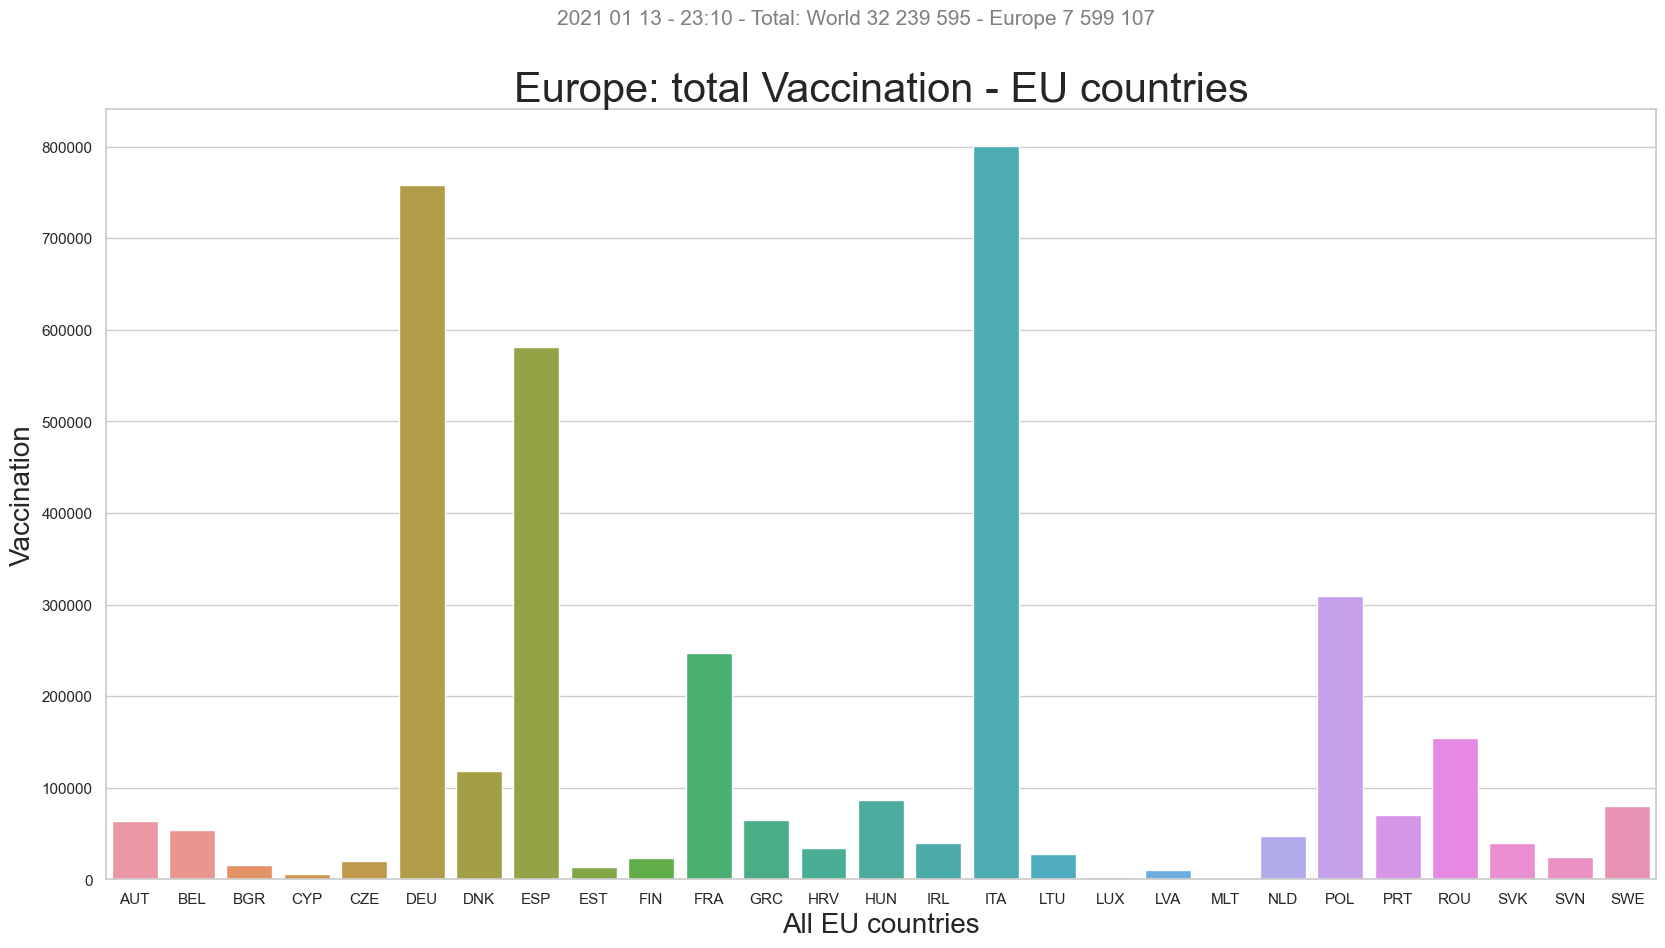

In [51]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

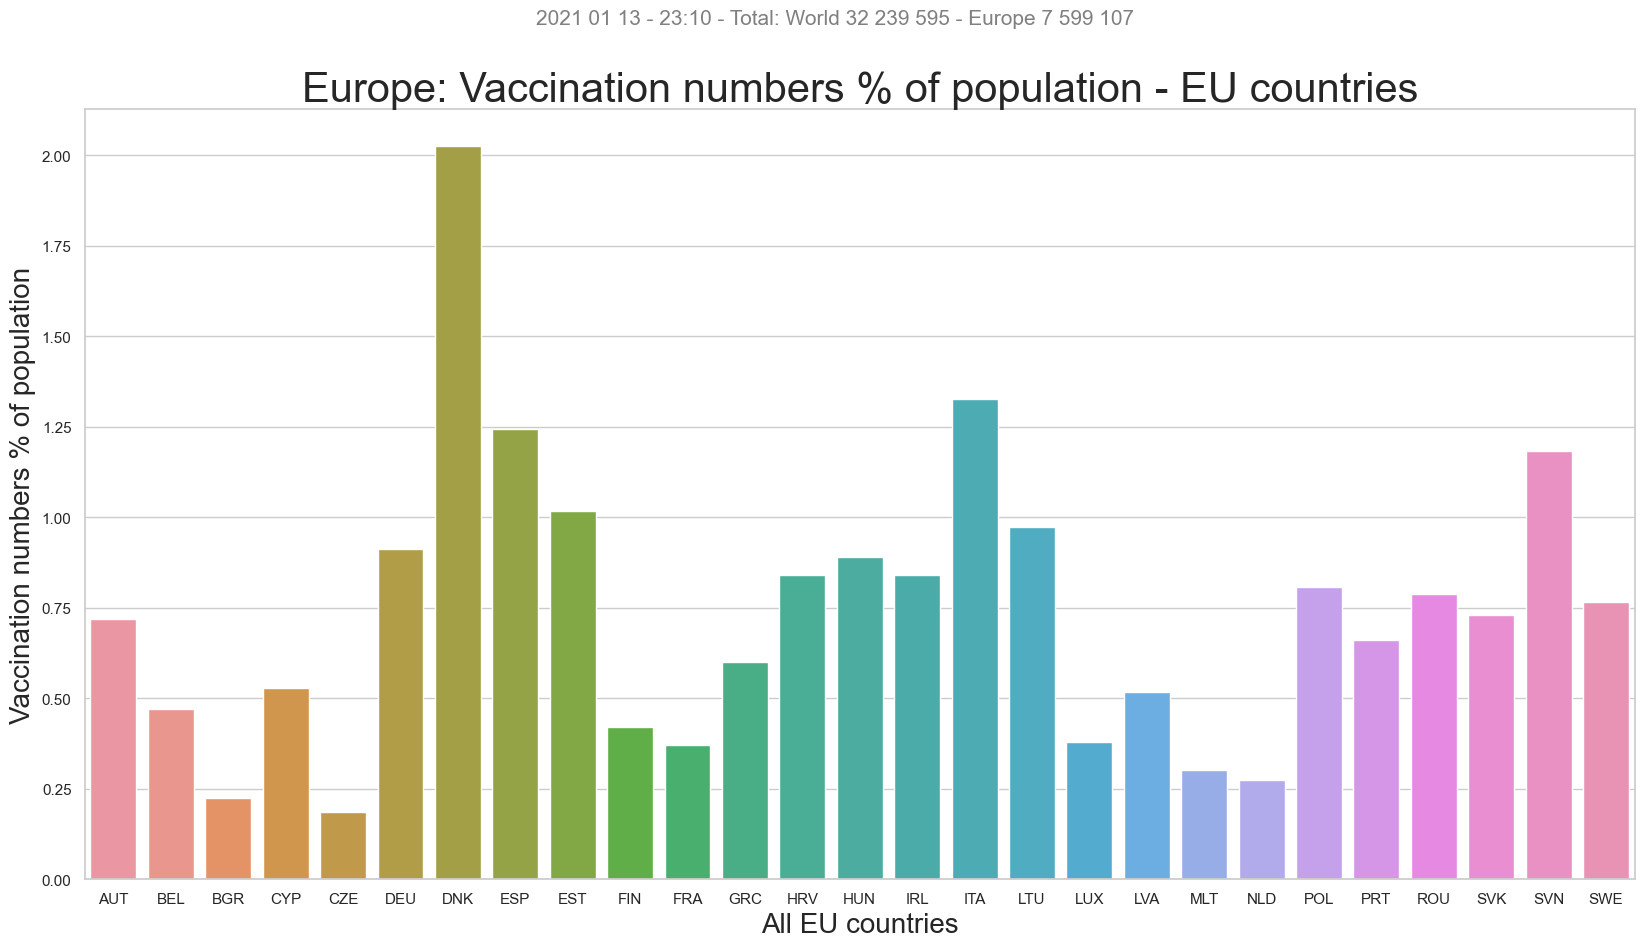

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [53]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,memberEU,head_gender,ISO3166-1,total_vaccinations,vaccinations_population_percent,country
8,Member in EU,male,AUT,63280.0,0.718339,Austria
24,Member in EU,male,BEL,53726.0,0.469986,Belgium
22,Member in EU,male,BGR,15780.0,0.225427,Bulgaria
37,Member in EU,male,CYP,6035.0,0.528845,Cyprus
42,Member in EU,male,CZE,19918.0,0.186255,Czech Republic
31,Member in EU,female,DEU,758093.0,0.911725,Germany
14,Member in EU,female,DNK,118073.0,2.026148,Denmark
0,Member in EU,male,ESP,581638.0,1.244597,Spain
44,Member in EU,male,EST,13481.0,1.017572,Estonia
9,Member in EU,female,FIN,23126.0,0.420393,Finland


### Countries in EU not delivering Vaccination statistics

In [54]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,memberEU,total_vaccinations,country,ISO3166-1


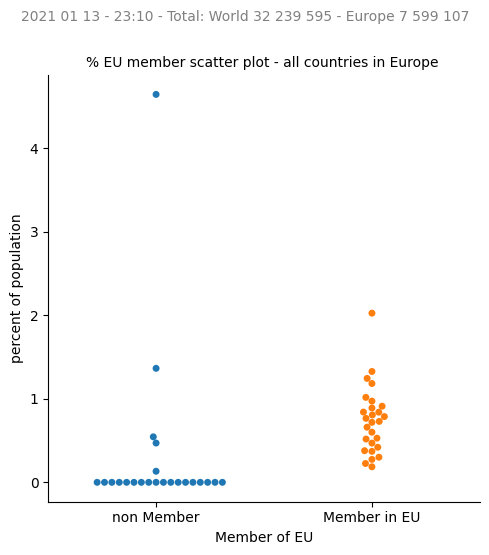

In [55]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [56]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 36 to 12
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   memberEU                         50 non-null     object 
 1   head_gender                      50 non-null     object 
 2   ISO3166-1                        50 non-null     object 
 3   total_vaccinations               50 non-null     float64
 4   vaccinations_population_percent  50 non-null     float64
 5   country                          50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [57]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

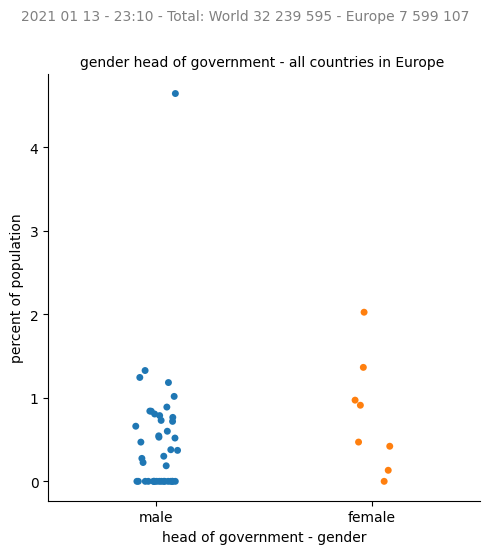

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

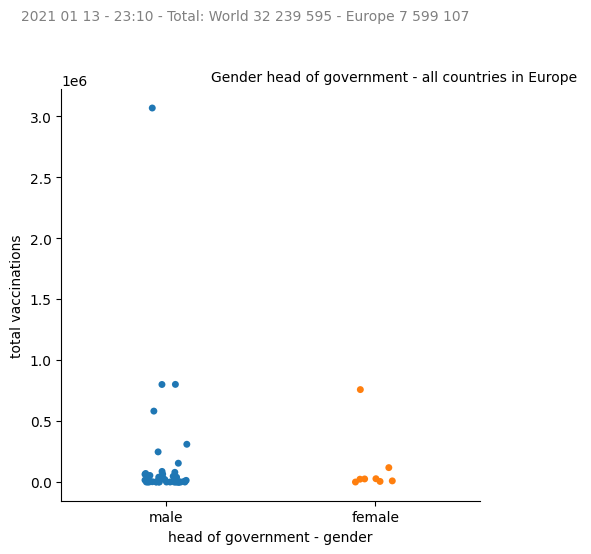

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

32 239 595 (48, 3) 7 599 107 (32, 21)


In [61]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-13 23:11:23.520185
Time elapsed (hh:mm:ss.ms) 0:00:33.281659


In [62]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)